# Find the correlation with the value and most frequency motif

In [1]:
import pandas as pd

df1 = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_sk_df100.csv')

df2 = pd.read_csv('haplo-utr3-oligo-pool.csv')
merged_df = pd.merge(df1, df2, on='Name', how='inner')
merged_df.head()

# extract only several columns
columns_to_extract = ['Name','Sequence', 'log2FoldChange']

# Extract the specified columns
selected_columns = merged_df[columns_to_extract]

# Display the extracted DataFrame
print(selected_columns)
selected_columns.to_csv('oligo_FC_sk.csv', index=False)

                                 Name  \
0          AAGAB|ENST00000261880.10|1   
1          AAGAB|ENST00000261880.10|2   
2          AAGAB|ENST00000261880.10|3   
3          AAGAB|ENST00000261880.10|4   
4          AAGAB|ENST00000261880.10|5   
...                               ...   
11522  STXBP1-frag-1821-win-221-mut-4   
11523  STXBP1-frag-1821-win-241-mut-1   
11524  STXBP1-frag-1821-win-241-mut-2   
11525  STXBP1-frag-1821-win-241-mut-3   
11526  STXBP1-frag-1821-win-241-mut-4   

                                                Sequence  log2FoldChange  
0      GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...        0.542017  
1      GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...        0.457778  
2      GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...       -0.036766  
3      GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...        0.483780  
4      GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...        0.644686  
...                                                  ... 

In [2]:
# extract only several columns
columns_to_extract = ['Name','Sequence', 'log2FoldChange']

# Extract the specified columns
selected_columns = merged_df[columns_to_extract]

# Display the extracted DataFrame
print(selected_columns)

                                 Name  \
0          AAGAB|ENST00000261880.10|1   
1          AAGAB|ENST00000261880.10|2   
2          AAGAB|ENST00000261880.10|3   
3          AAGAB|ENST00000261880.10|4   
4          AAGAB|ENST00000261880.10|5   
...                               ...   
11522  STXBP1-frag-1821-win-221-mut-4   
11523  STXBP1-frag-1821-win-241-mut-1   
11524  STXBP1-frag-1821-win-241-mut-2   
11525  STXBP1-frag-1821-win-241-mut-3   
11526  STXBP1-frag-1821-win-241-mut-4   

                                                Sequence  log2FoldChange  
0      GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...        0.542017  
1      GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...        0.457778  
2      GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...       -0.036766  
3      GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...        0.483780  
4      GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...        0.644686  
...                                                  ... 

In [3]:
selected_columns.to_csv('oligo_FC_sk.csv', index=False)

# The correlation between RNA/DNA ratio and ATTTA, AAAAAA, AATAAA motif

In [4]:
import pandas as pd

# Load data
df = pd.read_csv('oligo_FC_sk.csv')

# Define motifs (as a list of two possible motifs)
motifs = ['AATAAA', 'ATTAAA']

# Count occurrences of either motif in each sequence
df['motif_count'] = df['Sequence'].apply(lambda x: sum(x.count(motif) for motif in motifs))

# Print results
print(df.head())


                         Name  \
0  AAGAB|ENST00000261880.10|1   
1  AAGAB|ENST00000261880.10|2   
2  AAGAB|ENST00000261880.10|3   
3  AAGAB|ENST00000261880.10|4   
4  AAGAB|ENST00000261880.10|5   

                                            Sequence  log2FoldChange  \
0  GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...        0.542017   
1  GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...        0.457778   
2  GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...       -0.036766   
3  GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...        0.483780   
4  GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...        0.644686   

   motif_count  
0            0  
1            0  
2            0  
3            1  
4            1  


In [5]:
# correlation
df1 = df.iloc[:,[2,3]]
print(df1.head())

corr = df1.corr(method="pearson")
corr

   log2FoldChange  motif_count
0        0.542017            0
1        0.457778            0
2       -0.036766            0
3        0.483780            1
4        0.644686            1


,log2FoldChange,motif_count
log2FoldChange,1.000000,-0.554457
motif_count,-0.554457,1.000000


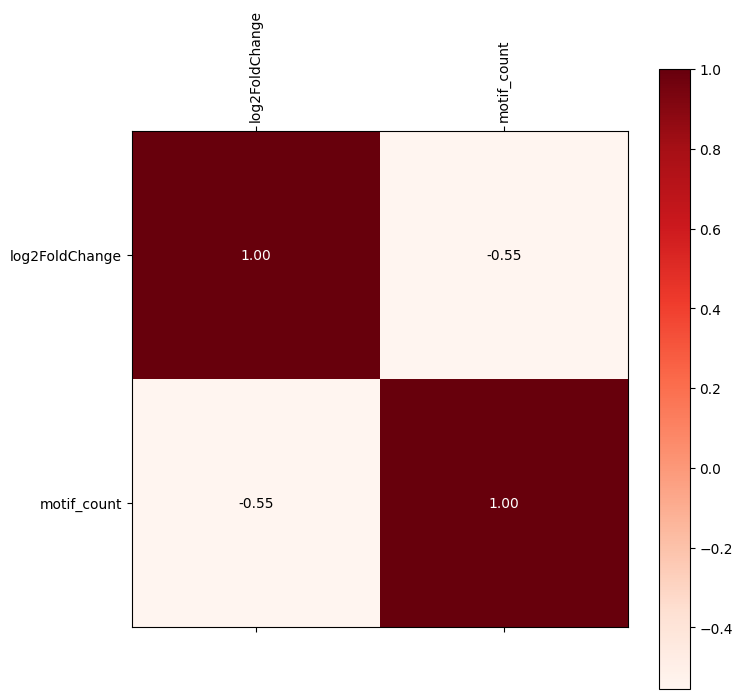

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation
corr = df1.corr(method="pearson")

# Create the figure and plot the heatmap
fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap="Reds", fignum=fig.number)

# Add x and y labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical")
plt.yticks(range(len(corr.columns)), corr.columns)

# Add color bar
plt.colorbar()

# Annotate the heatmap with the correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(
            j,
            i,
            f"{corr.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black" if abs(corr.iloc[i, j]) < 0.8 else "white",  # Adjust text color for readability
        )

plt.show()


/tmp/ipykernel_2023617/3690663746.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='motif_count', y='log2FoldChange', data=filtered_df, palette='Set1')


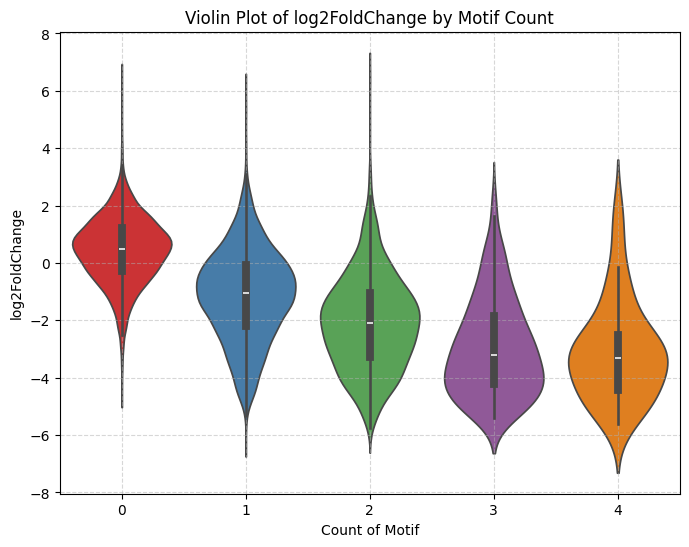

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to count the occurrence of the motif
def count_motif(sequence, motif):
    return sequence.count(motif)

# Load data (assuming df is already defined)
# df = pd.read_csv('oligo_FC_hek.csv')

# Filter the rows where motif_count is less than 5
filtered_df = df[df['motif_count'] < 5]

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='motif_count', y='log2FoldChange', data=filtered_df, palette='Set1')

# Formatting
plt.title('Violin Plot of log2FoldChange by Motif Count')
plt.xlabel('Count of Motif')
plt.ylabel('log2FoldChange')
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


/tmp/ipykernel_2023617/1703466215.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='motif_presence', y='log2FoldChange', data=df, palette=['blue', 'red'])


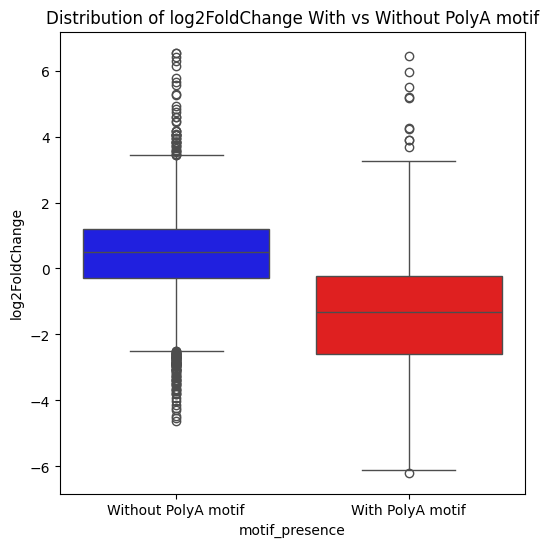

Mann-Whitney U test statistic: 5499123.0
P-value: 0.0e+00


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Define a new column to classify sequences
df['motif_presence'] = df['motif_count'].apply(lambda x: 'With PolyA motif' if x > 0 else 'Without PolyA motif')

# Remove NaN or infinite values from log2FoldChange
df = df[df['log2FoldChange'].notna()]  # Drop NaN values
df = df[~df['log2FoldChange'].isin([float('inf'), float('-inf')])]  # Remove infinite values

# Separate log2FoldChange values into two groups
log2FC_with_motif = df[df['motif_count'] > 0]['log2FoldChange']
log2FC_without_motif = df[df['motif_count'] == 0]['log2FoldChange']

# Ensure both groups have valid values
if len(log2FC_with_motif) > 0 and len(log2FC_without_motif) > 0:
    # Perform Mann-Whitney U test (two-sided)
    u_stat, p_value = mannwhitneyu(log2FC_with_motif, log2FC_without_motif, alternative='two-sided')
else:
    p_value = float('nan')  # Assign NaN if test cannot be performed

# Define significance level annotation
if p_value < 0.001:
    significance = '***'  # Highly significant
elif p_value < 0.01:
    significance = '**'   # Very significant
elif p_value < 0.05:
    significance = '*'    # Significant
elif pd.isna(p_value):
    significance = 'N/A'  # Not applicable (invalid test)
else:
    significance = 'n.s.'  # Not significant

# Format p-value in scientific notation if valid
p_value_sci = f'{p_value:.1e}' if not pd.isna(p_value) else 'N/A'

plt.figure(figsize=(6, 6))
sns.boxplot(x='motif_presence', y='log2FoldChange', data=df, palette=['blue', 'red'])

# Annotate the plot with the U test p-value in scientific notation and significance
# plt.text(0.5, max(df['log2FoldChange']) * 0.9, f'p = {p_value_sci} {significance}', 
#          ha='center', fontsize=12, color='red', fontweight='bold')

plt.ylabel('log2FoldChange')
plt.title('Distribution of log2FoldChange With vs Without PolyA motif')
plt.show()

# Print test results
print(f"Mann-Whitney U test statistic: {u_stat}")
print(f"P-value: {p_value_sci}")

# Most frequency motif based on ratio

In [14]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import product

# Load data 
df = pd.read_csv('oligo_FC_hek.csv')

# Replace inf with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Generate all possible 5-nt motifs
bases = ['A', 'T', 'C', 'G']
motifs = [''.join(p) for p in product(bases, repeat=5)]

# Function to count a motif in a sequence
def count_motif(sequence, motif):
    return sequence.count(motif)

# Adjust sequences to consider only the 16th to 185th nucleotides
# Python uses 0-based indexing, so we need positions 15 to 185
df['Adjusted Sequence'] = df['Sequence'].apply(lambda x: x[15:285])

len(df['Adjusted Sequence'][1])


270

In [15]:
from scipy.stats import ttest_ind

summary = []

for motif in motifs:
        # count occurrences of each motif in each sequence
        df[motif] = df['Adjusted Sequence'].apply(lambda x: count_motif(x, motif))

        # Determine sequences with and without motif
        with_motif = df[df[motif] >0]
        without_motif = df[df[motif] == 0]

        # calculate ts mean value
        mean_with_motif = with_motif['log2FoldChange'].mean() if not with_motif.empty else np.nan
        mean_without_motif = without_motif['log2FoldChange'].mean() if not without_motif.empty else np.nan
        
        # t-test to analyze with_motif and without_motif, change Inf into nan, tsn omit nan
        with_motif['log2FoldChange'].replace([np.inf, -np.inf], np.nan, inplace=True)
        without_motif['log2FoldChange'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        t_stat, p_value = ttest_ind(with_motif['log2FoldChange'], without_motif['log2FoldChange'],equal_var=False, nan_policy='omit')

        summary.append({
            'Motif': motif,
            'Count_With_Motif': len(with_motif),
            'Count_Without_Motif': len(without_motif),
            'Mean_Value_With_Motif': mean_with_motif,
            'Mean_Value_Without_Motif': mean_without_motif,
            'Pvalue': p_value
    
        })

/tmp/ipykernel_3715928/263528942.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  with_motif['log2FoldChange'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_3715928/263528942.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_motif['log2FoldChange'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_37

In [16]:
# Convert the summary list to a df
summary_df = pd.DataFrame(summary)
print(summary_df.head(), len(summary_df))

   Motif  Count_With_Motif  Count_Without_Motif  Mean_Value_With_Motif  \
0  AAAAA              5790                 5929              -0.635491   
1  AAAAT              6591                 5128              -0.637497   
2  AAAAC              4496                 7223              -0.538023   
3  AAAAG              5427                 6292              -0.540033   
4  AAATA              5744                 5975              -0.729005   

   Mean_Value_Without_Motif         Pvalue  
0                  0.177900  1.008524e-239  
1                  0.307531   0.000000e+00  
2                 -0.028489   4.034737e-85  
3                  0.048639  2.758847e-122  
4                  0.261536   0.000000e+00   1024


In [18]:
summary_df['Difference'] = summary_df['Mean_Value_With_Motif']- summary_df['Mean_Value_Without_Motif']
sorted_df = summary_df.sort_values(by='Difference', ascending=False)
sorted_df.to_csv('motif_FC_hek.csv', index=False)

In [19]:
df = pd.read_csv('motif_FC_hek.csv')
df.head()

,Motif,Count_With_Motif,Count_Without_Motif,Mean_Value_With_Motif,Mean_Value_Without_Motif,Pvalue,Difference
0,CGCGG,279,11440,0.748250,-0.247682,2.686048e-38,0.995932
1,CGGCG,282,11437,0.712401,-0.247060,2.034179e-38,0.959461
2,CCGCG,337,11382,0.691735,-0.251084,7.165805e-39,0.942819
3,CGCGA,219,11500,0.668400,-0.240966,3.314293e-32,0.909365
4,CCGGC,728,10991,0.626550,-0.280307,5.100360e-94,0.906857


In [20]:
df.tail()

,Motif,Count_With_Motif,Count_Without_Motif,Mean_Value_With_Motif,Mean_Value_Without_Motif,Pvalue,Difference
1019,TTAAA,6186,5533,-0.692445,0.299790,0.0,-0.992235
1020,TAAAT,4860,6859,-0.811119,0.192056,0.0,-1.003175
1021,TAAAA,6265,5454,-0.723925,0.350324,0.0,-1.074249
1022,AATAA,4894,6825,-0.923631,0.277733,0.0,-1.201364
1023,ATAAA,5103,6616,-0.958352,0.342464,0.0,-1.300816


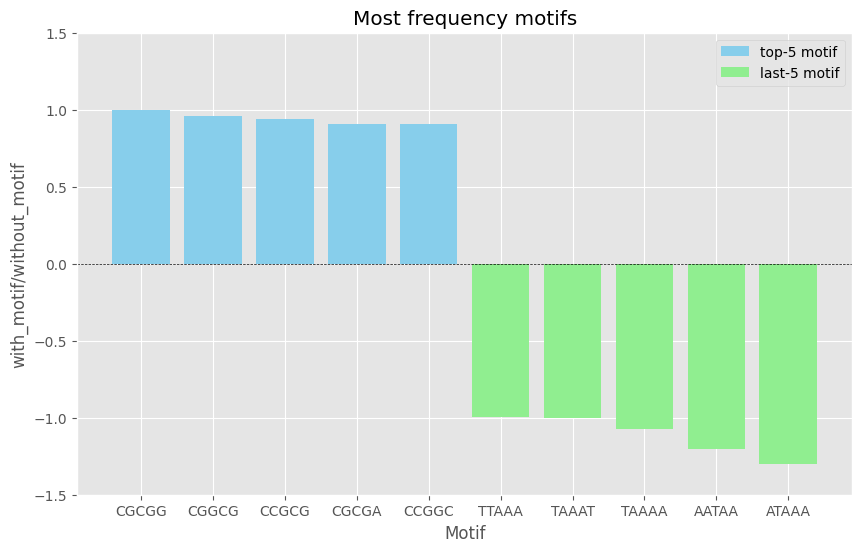

In [28]:
# using the top 5 and tail 5 most frequenct motif to draw a bar plot using Difference

import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv('motif_FC_hek.csv')

top_5 = df.loc[:4, ['Motif','Difference']]
tail_5 = df.loc[df.shape[0]-5:, ['Motif', 'Difference']]

select_df = pd.concat([top_5, tail_5])

# create x-axis labels
motif_labels = select_df['Motif']
select_df.index = motif_labels

# draw bar plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colors for the two groups
colors = ['skyblue', 'lightgreen']

# Plot the first 5 rows
ax.bar(top_5['Motif'], top_5['Difference'], bottom=0, color=colors[0], label='top-5 motif')

# Plot the last 5 rows
ax.bar(tail_5['Motif'], tail_5['Difference'], bottom=0, color=colors[1], label='last-5 motif')

# Adding titles and labels
plt.title('Most frequency motifs')
plt.xlabel('Motif')
plt.ylabel('with_motif/without_motif')

# Draw a horizontal line at y=1
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Legend
plt.legend()

# Adjust the y-axis to better show the plot based on your data's range
plt.ylim(-1.5,1.5)

# Show the plot
plt.show()